In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [6]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [7]:
!pip install -Uqq duckduckgo_search

In [8]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [9]:
image_searched = search_images_ddg('closeup skin')
len(image_searched)
image_searched

(#200) ['https://jooinn.com/images/human-skin-4.jpg','https://c.stocksy.com/a/UXDC00/z9/2911984.jpg','https://t3.ftcdn.net/jpg/01/33/35/66/360_F_133356650_OdCl5alz82czIgP1ihhtJg2z1U6Lj07x.jpg','https://thumbs.dreamstime.com/z/beautiful-woman-female-skin-care-healthy-hair-skin-close-up-face-beauty-portrait-beautiful-woman-female-skin-care-healthy-hair-137457631.jpg','https://i.pinimg.com/originals/67/db/03/67db035b10d02f025cacc63e7cdda102.jpg','https://get.wallhere.com/photo/face-black-women-monochrome-model-portrait-long-hair-blue-eyes-photography-celebrity-closeup-black-hair-fashion-hair-nose-skin-Megan-Fox-head-supermodel-girl-beauty-eye-darkness-lip-hairstyle-1920x1200-px-black-and-white-monochrome-photography-portrait-photography-photo-shoot-brown-hair-eyebrow-human-body-organ-close-up-558644.jpg','https://thumbs.dreamstime.com/b/closeup-young-ardent-healthy-skin-woman-applying-lipstick-looking-camera-close-up-fair-her-lip-beauty-concept-258108083.jpg','https://c8.alamy.com/comp/GM

In [10]:
dest = 'images/clean.jpg'
download_url(image_searched[0], dest, show_progress=False)

Path('images/clean.jpg')

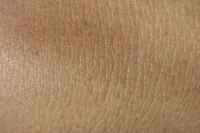

In [11]:
img = Image.open(dest)
img.to_thumb(200,200)

In [12]:
skin_types = 'closeup skin', 'closeup black skin', 'closeup brown skin', 'closeup hands skin', 'closeup legts skin', 'natural skin faces' 
path = Path('skin_conditions')

In [13]:
if not path.exists():
    path.mkdir()
    for o in skin_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results=search_images_ddg(o, 100)
        download_images(dest, urls=results)

In [14]:
fns = get_image_files(path)

In [15]:
fns

(#541) [Path('skin_conditions/closeup hands skin/e2444c97-a75e-420c-a990-dc6269a01b39.jpg'),Path('skin_conditions/closeup hands skin/012d0671-5d73-4182-ae6e-6b73fe10abf7.jpg'),Path('skin_conditions/closeup hands skin/f81c8d60-26ab-4cc1-a403-b8a8849de811.jpg'),Path('skin_conditions/closeup hands skin/b87c8010-a776-481f-9cbb-2f4b1fd54154.jpg'),Path('skin_conditions/closeup hands skin/b6625072-d7af-41b4-af7d-47d0886d5d2f.jpg'),Path('skin_conditions/closeup hands skin/b216c875-e17f-47e6-92e9-dcd2a1aaf853.jpg'),Path('skin_conditions/closeup hands skin/468f3d85-b616-4c6b-8836-329f193dae94.jpg'),Path('skin_conditions/closeup hands skin/f56b8235-b4ee-4130-ae82-695f13898bd4.jpeg'),Path('skin_conditions/closeup hands skin/c06a4bf3-f450-416b-be17-69f684209dc6.jpg'),Path('skin_conditions/closeup hands skin/687bec49-aa54-4229-a48e-c6795434f875.jpg')...]

In [16]:
corrupt_images = verify_images(fns)
corrupt_images

(#37) [Path('skin_conditions/closeup hands skin/c06a4bf3-f450-416b-be17-69f684209dc6.jpg'),Path('skin_conditions/closeup hands skin/c7afc3dc-47a3-4799-90be-094731d85bcc.jpg'),Path('skin_conditions/closeup hands skin/55c63a2f-a025-4a8f-b1e8-93d88e79154d.jpg'),Path('skin_conditions/closeup hands skin/5a7557dd-fb1a-4a1f-b5a6-09658d7a6e03.jpg'),Path('skin_conditions/closeup hands skin/0e44451f-de86-42b2-a386-3f645df3ac6c.jpg'),Path('skin_conditions/closeup hands skin/1b6c25e6-8984-4cab-a1ae-c676e482732b.jpg'),Path('skin_conditions/closeup hands skin/2ab3c55b-d7c8-4f44-a806-9a194a0d225e.jpg'),Path('skin_conditions/closeup hands skin/2c6ca06d-daed-4970-b4e4-cf1c7c1abd96.jpg'),Path('skin_conditions/closeup hands skin/abf659cf-c577-44f5-a767-c6679fb9bf64.jpg'),Path('skin_conditions/closeup hands skin/989a9fc9-eec8-4f37-979a-90c8c4409d71.jpg')...]

In [17]:
corrupt_images.map(Path.unlink);

In [20]:
import shutil

# Specify the folder path that contains your images
folder_path = 'skin_conditions'  # Replace with your folder path

# Define the name of the zip file
zip_file_name = 'skin_conditions.zip'

# Zip the folder
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', folder_path)

'/kaggle/working/skin_conditions.zip'

In [21]:
from IPython.display import FileLink

# Create a downloadable link
FileLink(zip_file_name)

/kaggle/working/skin_conditions.zip